In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-4bc1ad49-55cf-3db2-a3d8-e5c0b5d5630d)


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [3]:
# necessary library for text pre-processing
!pip install -U 'spacy[cuda112]'     #  CUDA Version: 11.2
!pip install -U spacy-transformers

     |████████████████████████████████| 51 kB 163 kB/s 
     |████████████████████████████████| 451 kB 18.0 MB/s 
     |████████████████████████████████| 1.1 MB 56.7 MB/s 
     |████████████████████████████████| 6.0 MB 42.5 MB/s 
     |████████████████████████████████| 3.4 MB 51.3 MB/s 
     |████████████████████████████████| 181 kB 67.3 MB/s 
     |████████████████████████████████| 10.1 MB 46.1 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 628 kB 71.2 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 596 kB 52.2 MB/s 
     |████████████████████████████████| 3.3 MB 60.4 MB/s 
     |████████████████████████████████| 895 kB 53.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstal

In [4]:
# link to dataset (kaggle) : https://www.kaggle.com/kazanova/sentiment140

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [7]:
# import all necessary modules
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# import dataset

In [9]:
df = pd.read_csv('/content/MyDrive/MyDrive/datasets/shorteneddataset.csv', encoding='latin-1')

In [10]:
df.head()

,sentiment,tweet
0,0,"Addai - I like you, but I don't think I can ha..."
1,0,i've only been up for a few minutes. now i hav...
2,0,"The activation code finally works, now I can s..."
3,4,Official New Moon trailer! http://tinyurl.co...
4,4,@CoachVanessa good additions


In [11]:
df.shape

(320000, 2)

In [12]:
df['sentiment'].nunique()

2

In [13]:
# there are only two types of sentiments i.e Negative(Sad) and Positive(Happy)
# 0 = Negative
# 4 = Positive

In [14]:
# check for any nan values
df.isnull().sum()

sentiment    0
tweet        0
dtype: int64

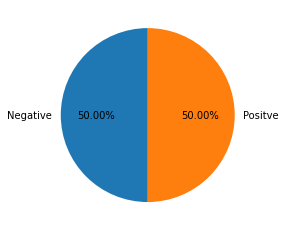

In [15]:
# check whether dataset is balanced or not
plt.pie(df['sentiment'].value_counts(), labels=['Negative', 'Positve'], autopct="%.2f%%", startangle=90)
plt.show()

In [16]:
# data is in balanced form

In [17]:
# Texts (tweets) preprocessing
# need to clean the tweets i.e text column

In [18]:
# for preprocessing purpose i will use spacy library

In [19]:
import spacy
import torch

In [27]:
spacy.require_gpu()      # spacy.require_gpu() or spacy.prefer_gpu()

True

In [21]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 460.2 MB 27 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [28]:
spacy_model = spacy.load('en_core_web_trf')

In [23]:
# df['tweet'][:50000] = df['tweet'][:50000].apply(spacy_model)

In [24]:
# df['tweet'][50000:100000] = df['tweet'][50000:100000].apply(spacy_model)

In [25]:
# df['tweet'][100000:150000] = df['tweet'][100000:150000].apply(spacy_model)

In [ ]:
df['tweet'][150000:200000] = df['tweet'][150000:200000].apply(spacy_model)

In [ ]:
df['tweet'][200000:250000] = df['tweet'][200000:250000].apply(spacy_model)

In [ ]:
df['tweet'][250000:300000] = df['tweet'][250000:300000].apply(spacy_model)

In [33]:
torch.cuda.empty_cache()

In [ ]:
df['tweet'][300000:320001] = df['tweet'][300000:320001].apply(spacy_model)

In [35]:
pattern = re.compile('[^A-Za-z]+')

In [39]:
i = 0

In [40]:
for sentence in df['tweet']:
  clean_sentence = []
  for word in sentence:
    if word.is_stop or word.is_punct or word.is_quote or len(word.lemma_) < 3:
      pass
    elif word.like_num == True:
      clean_sentence.append('num')
    elif word.like_email == True:
      clean_sentence.append('email')
    elif word.like_url == True:
      clean_sentence.append('url')
    else:
      clean_sentence.append(re.sub(pattern, ' ', word.lemma_.lower()).strip())
  clean_sentence = " ".join(clean_sentence)
  df['tweet'].iloc[i] = clean_sentence
  i += 1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
df.to_csv('/content/MyDrive/MyDrive/datasets/cleanedsentiment.csv')